In [1]:
import time
from functools import partial
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import itertools

In [55]:
# Define flops for continual scaled dot product block

def sdpa(n, d):
    return sum([
        2 * n * n * d + 2 * n * d, # mul
        2 * n * n * d - n * d - n, # add
        n * n, # exp
    ])

def coresdpa(n, d):
    return sum([
        7 * n * d + 2 * n - 3 * d, # mul
        6 * n * d + 3 * n - 6 * d - 3, # add
        3 * n - 2, # exp
    ])

def colesdpa(n, d):
    return sum([
        2 * n * d + 2 * d, # mul
        2 * n * d - d - 1, # add
        n, # exp
    ])

E = 100
N = 1000
sdpa(N, E) / coresdpa(N, E), sdpa(N, E) / colesdpa(N, E)  

(306.8629288613299, 1000.0)

In [36]:
num_x_points = 5000

ex = np.logspace(0, 2, num=num_x_points)
nx = np.logspace(0, 2, num=num_x_points)

num_y_points = 4
ey = np.array([10**i for i in range(num_y_points)])
ny = np.array([10**i for i in range(num_y_points)])

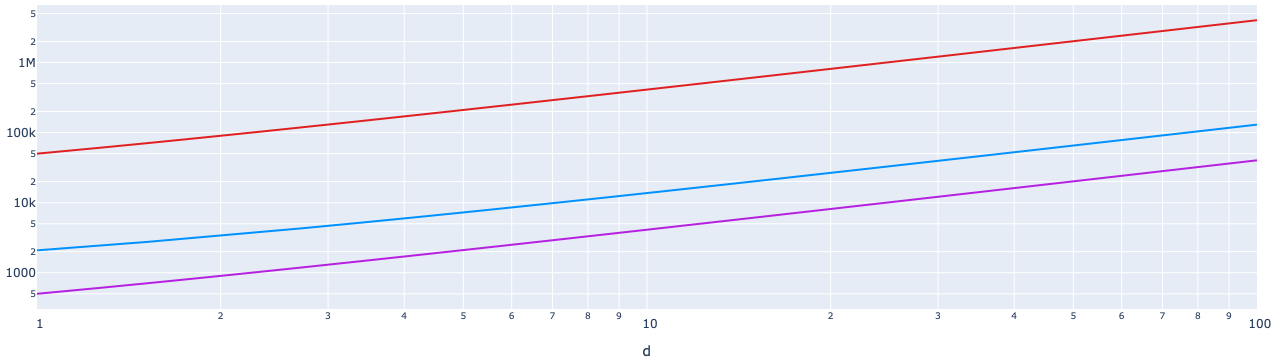

In [39]:
fig = go.Figure()
linewidth = 2
cred = "#E02020"
cblue = "#0091FF"
cpur = "#B620E0"

N = 100

fig.add_trace(go.Scatter(x=ex, y=[sdpa(N, e) for e in ex], mode='lines', name='SDPA', line=dict(color=cred, width=linewidth),))

fig.add_trace(go.Scatter(x=ex, y=[coresdpa(N, e) for e in ex], mode='lines', name='CoReSDPA', line=dict(color=cblue, width=linewidth),))

fig.add_trace(go.Scatter(x=ex, y=[colesdpa(N, e) for e in ex], mode='lines', name='CoLeSDPA', line=dict(color=cpur, width=linewidth),))

margin = 5
fig.update_layout(
    autosize=False,
    width=250,
    height=250,
    showlegend=False,
    xaxis_title="d",
    # yaxis_title="FLOPs / step",
    margin=dict(l=margin, r=margin, t=margin, b=margin)
)
fig.write_image("figures/theory_attn_comp_fixed_n.pdf")

fig.update_xaxes(type="log")
fig.update_yaxes(type="log")
fig.write_image("figures/theory_attn_comp_fixed_n_loglog.pdf")

fig.show()

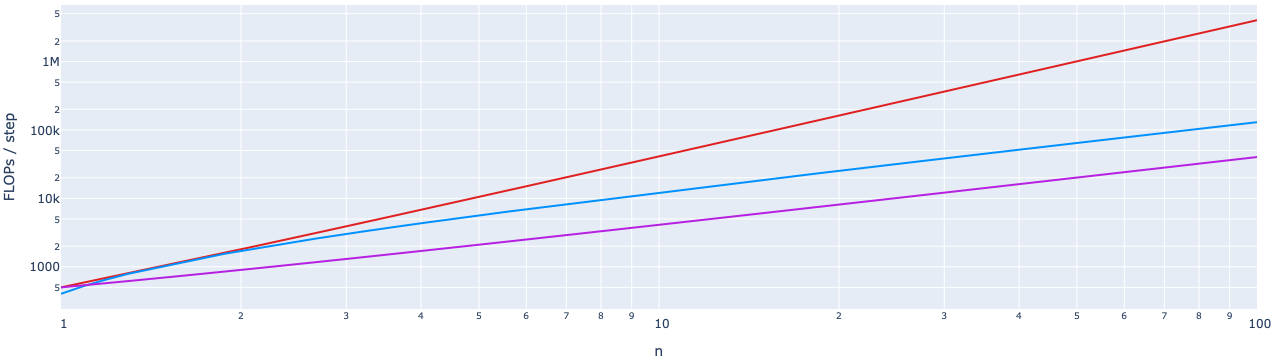

In [40]:
fig = go.Figure()
linewidth = 2
cred = "#E02020"
cblue = "#0091FF"
cpur = "#B620E0"

E = 100

fig.add_trace(go.Scatter(x=ex, y=[sdpa(n, E) for n in nx], mode='lines', name='SDPA', line=dict(color=cred, width=linewidth),))

fig.add_trace(go.Scatter(x=ex, y=[coresdpa(n, E) for n in nx], mode='lines', name='CoReSDPA', line=dict(color=cblue, width=linewidth),))

fig.add_trace(go.Scatter(x=ex, y=[colesdpa(n, E) for n in nx], mode='lines', name='CoLeSDPA', line=dict(color=cpur, width=linewidth),))

margin = 5
fig.update_layout(
    autosize=False,
    width=270,
    height=250,
    showlegend=False,
    xaxis_title="n",
    yaxis_title="FLOPs / step",
    margin=dict(l=margin, r=margin, t=margin, b=margin)
)
fig.write_image("figures/theory_attn_comp_fixed_d.pdf")

fig.update_xaxes(type="log")
fig.update_yaxes(type="log")
fig.write_image("figures/theory_attn_comp_fixed_d_loglog.pdf")

fig.show()